# Employee Churn rate model

### Problem Definition

#### Attrition in a company can happen due to various reasons. Voluntary, Involuntary or Retirement. In this project I had developed a machine learning model based on the attributes given for an employee whether an employee will stay in the company or leave the company.

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## Import the libraries

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from plotly import __version__
import cufflinks as cf
from plotly.offline import download_plotlyjs,init_notebook_mode,plot, iplot
import plotly.graph_objects as go
import plotly.express as px
import plotly.figure_factory as ff
init_notebook_mode(connected = True)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
cf.go_offline()


from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings('ignore')


%matplotlib inline

## Loading data file 

In [5]:
df = pd.read_csv('C:/Users/Cassin/Desktop/WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [6]:
df.head()

print('Shape of the dataframe is {}'.format(df.shape))

Shape of the dataframe is (1470, 35)


In [7]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


# Data preprocessing

In [8]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

There are no missing values in the dataset. So, we don't have to preprocess the dataset.

#  Exploratory Data Analysis 

## Pairplot of all the variables

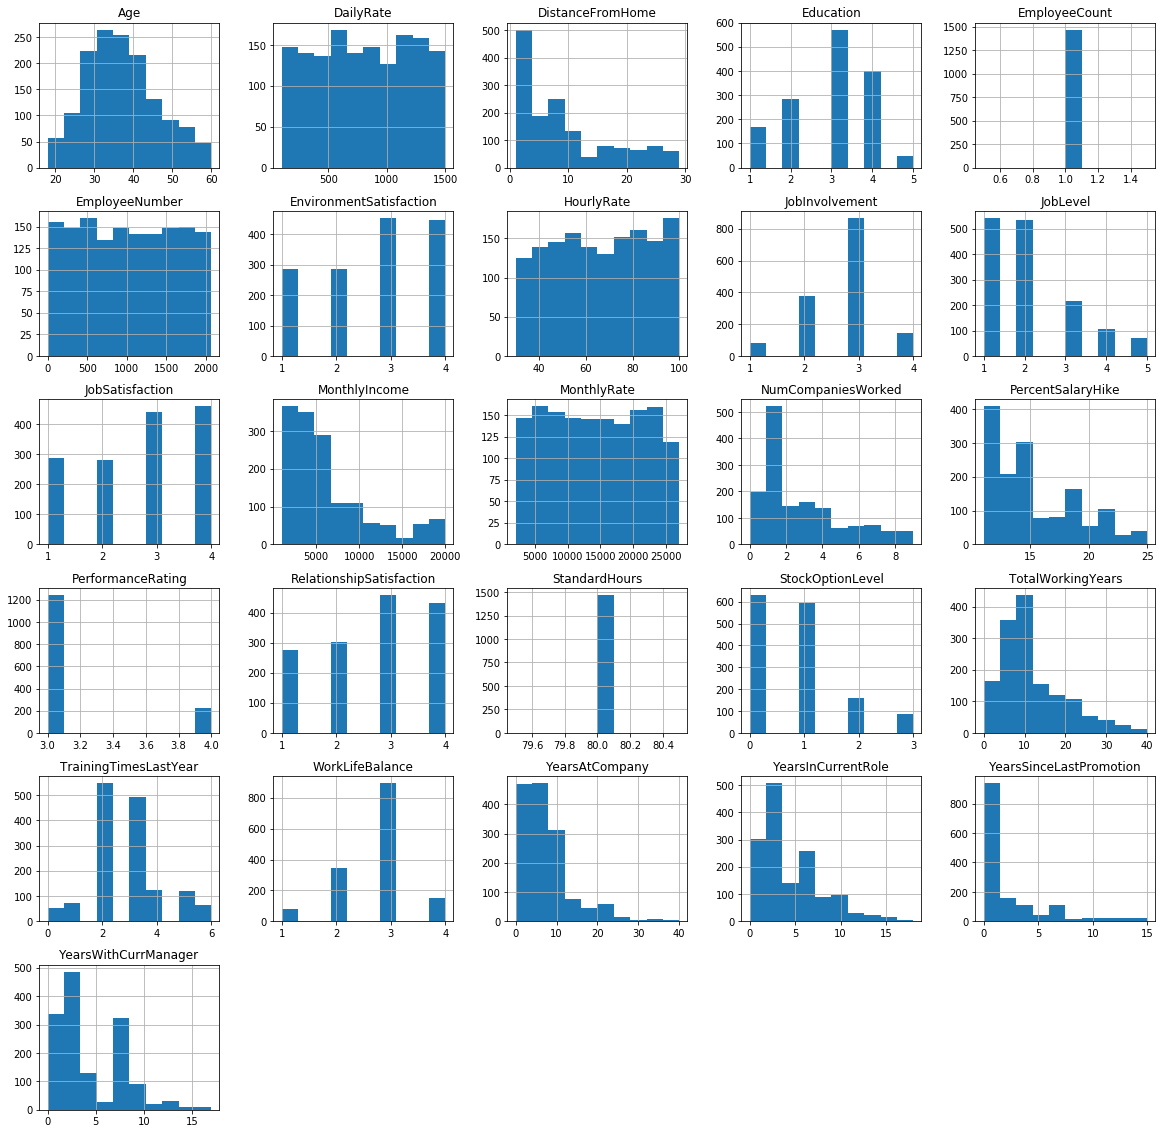

In [10]:
df.hist(figsize = (20,20))
plt.show()

* The age of the employees ranges from 18 to 60.
* Monthly Income of the employees range between 0 to 5000.
* The Number of companies most of the employees had worked previously is between 1 to 2.
* More than 400 employees have a work experience of in and around 10 years.


## Heatmap to find the correlation between all the variables.

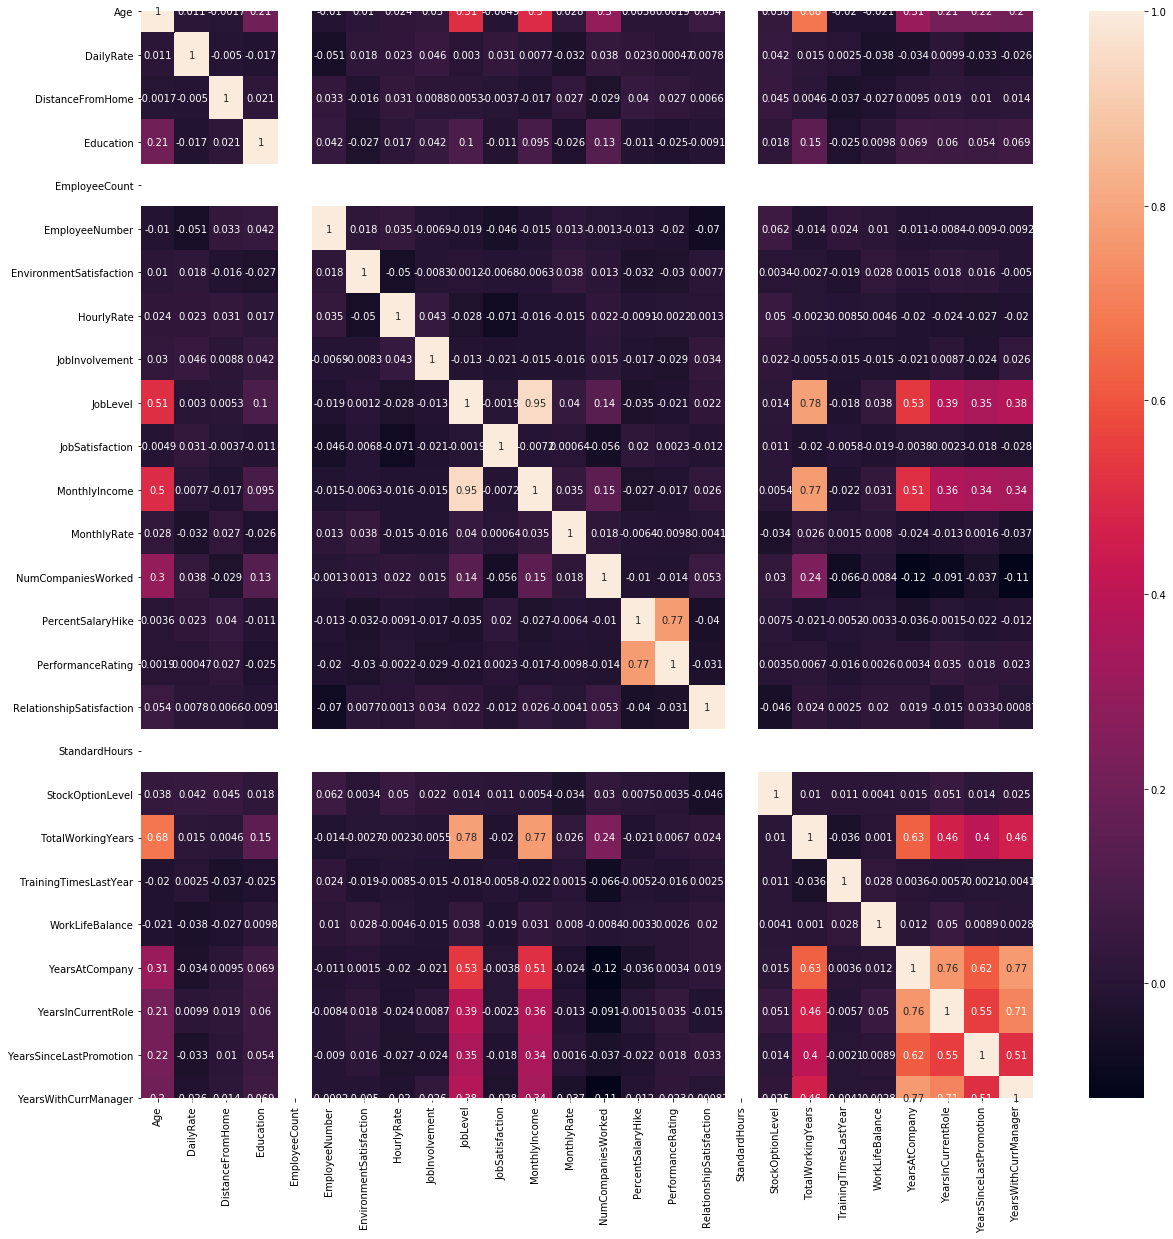

In [11]:
plt.figure(figsize = (20,20))
sns.heatmap(df.corr(), annot = True)

In [12]:
print('Average Age of Employees who left the company : {:.2f}'.format(df[df['Attrition'] == 'Yes']['Age'].mean()))
print('Average Age of Employees who left the company : {:.2f}'.format(df[df['Attrition'] == 'No']['Age'].mean()))

Average Age of Employees who left the company : 33.61
Average Age of Employees who left the company : 37.56


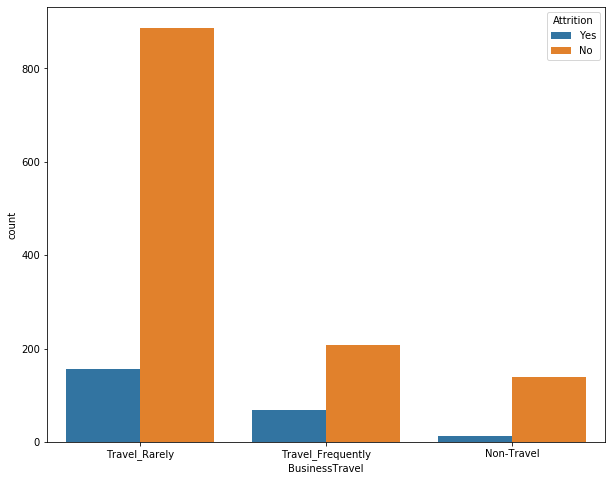

In [13]:
plt.figure(figsize = (10,8))
sns.countplot(x = 'BusinessTravel', hue = 'Attrition', data = df)

Employees who travel rarely tend to be the most who leave the company and stay in the company compared to other Business Travel criteria. But also it seems that this dataset seems to be imbalanced with more data towards Business Travel = 'Travel_Rarely'.

## Label encoding the Attrition variable 

In [14]:
le = LabelEncoder()
le.fit(df['Attrition'])
df['Attrition'] = le.transform(df['Attrition'])

In [15]:
a = []
b = [df['EducationField'].unique()]
for i in df['EducationField'].unique():
    a.append((df[(df['EducationField']==i) & (df['Attrition'] == 1)].shape[0]/df[df['EducationField']==i].shape[0])*100)
pd.DataFrame(a,b, columns = ['Attrition percentage by Education Field'])

,Attrition percentage by Education Field
Life Sciences,14.686469
Other,13.414634
Medical,13.577586
Marketing,22.012579
Technical Degree,24.242424
Human Resources,25.925926


In [16]:
xticklabels = ['Life Sciences','Other','Medical','Marketing','Technical Degree','Human Resources']
pd.DataFrame(a,b, columns = ['Attrition percentage by Education Field']).iplot(kind = 'bar')

In [20]:
df1 = df[df['Attrition'] == 1] 
abc = (df1.groupby('WorkLifeBalance').agg('count')['Attrition']/df.groupby('WorkLifeBalance').agg('count')['Attrition']) * 100
fig = px.bar(x = abc.index, y = abc.values, labels={'x': 'Work Life Balance', 'y' : 'Count'})
fig.show()

Employees who have a work life balance = 1 tend to leave the company very soon when compared to other employees.

In [ ]:
xticks = ['Female','Male']
abc = ((df[df['Attrition'] == 1].groupby('Gender').agg('count'))/(df.groupby('Gender').agg('count')) *100)['Attrition']
sns.barplot(xticks,abc)


Male has a higher proportion of Attrition than Female.

In [ ]:
df1 = df[df['Attrition'] == 1]
fig = px.histogram(df1, x= 'MonthlyIncome')
fig.show()

Most people having a MonthlyIncome between 2000-2999 are likely to leave the company and as the salary range increases the attrition rate decreases.

In [44]:
fig1 = px.histogram(df,x = 'HourlyRate')
fig1.show()

The Average Hourly rate of most of the employees is between 30-99 whereas only 19 employees get an hourly rate of 100-104.

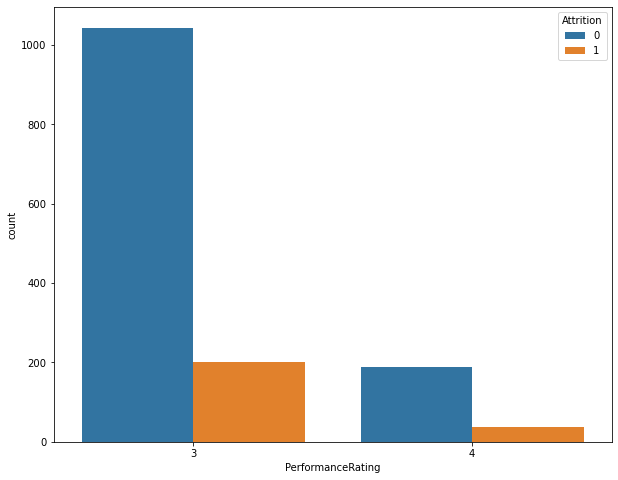

In [18]:
plt.figure(figsize = (10,8))
sns.countplot(x = 'PerformanceRating', hue = 'Attrition', data = df)

Employees who have a performance rating - 3 are more likely to be leaving the company when compared to performance rating - 4.

In [19]:
df_Attr_Yes = df[df['Attrition'] == 1]
abc = df_Attr_Yes['JobSatisfaction'].value_counts()/df['JobSatisfaction'].value_counts() * 100
fig = px.bar(x = abc.index, y = abc.values)
fig.show()

Employees with the least JobSatisfaction = 1 has the highest possibility of leaving the company.

In [20]:
fig2 = px.histogram(df[df['Attrition'] == 1], x = 'PercentSalaryHike', color = 'Attrition')
fig2.show()

The histogram of the percent salary hike for the employees whose Attrition == 'Yes' is plotted above and it shows that as the percent salary hike increases the attrition count decreases. This shows that employees who are not satisfied with the salary percent hike tend to leave the company.  

In [21]:
fig3 = px.pie(df[df['Attrition'] == 1],values = 'Attrition', names = 'Department',title = 'Attrition by Department')
fig3.show()

Attrition is mostly in the Reasearch & Development department and the least in the Human Resources department.

In [22]:
for col in df.columns[2:]:
    if df[col].dtype == 'object':
        if len(list(df[col].unique())) <=2:
            print(col)

Gender
Over18
OverTime


## Label encoding the Gender and OverTime variables as they have only 2 unique values

In [23]:
df['Gender'] = le.fit_transform(df['Gender'])
df['OverTime'] = le.fit_transform(df['OverTime'])

In [24]:
df.drop(columns = 'Over18',inplace = True)

We can drop the Over18 column since it has only one unique value and won't add value to the machine learning model.

In [25]:
df = pd.get_dummies(df,drop_first = True)

We have one hot encoded all other 'object' variables where the unique values in the column are greater than 2.

In [26]:
scaler = StandardScaler()
X = scaler.fit_transform(df)

We scale the whole dataset using StandardScaler to have all the features in a common scale while building a machine learning model.

In [27]:
df.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,...,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,41,1,1102,1,2,1,1,2,0,94,...,0,0,0,0,0,0,1,0,0,1
1,49,0,279,8,1,1,2,3,1,61,...,0,0,0,0,0,1,0,0,1,0
2,37,1,1373,2,2,1,4,4,1,92,...,0,1,0,0,0,0,0,0,0,1
3,33,0,1392,3,4,1,5,4,0,56,...,0,0,0,0,0,1,0,0,1,0
4,27,0,591,2,1,1,7,1,1,40,...,0,1,0,0,0,0,0,0,1,0


In [28]:
y = df.loc[:,'Attrition']

In [29]:
X = df.drop('Attrition', axis = 1)

We have splitted the dataset into train(X) and train(y) features.

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3,random_state = 42)
print('Shape of X_train {}'.format(X_train.shape))
print('Shape of X_test {}'.format(X_test.shape))
print('Shape of y_train {}'.format(y_train.shape))
print('Shape of y_test {}'.format(y_test.shape))

Shape of X_train (1029, 47)
Shape of X_test (441, 47)
Shape of y_train (1029,)
Shape of y_test (441,)


# **Model Building**

In [31]:
error_rate = []
for i in range(1,40):
    clf = KNeighborsClassifier(n_neighbors = i)
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    error_rate.append(np.mean(y_test != y_pred))

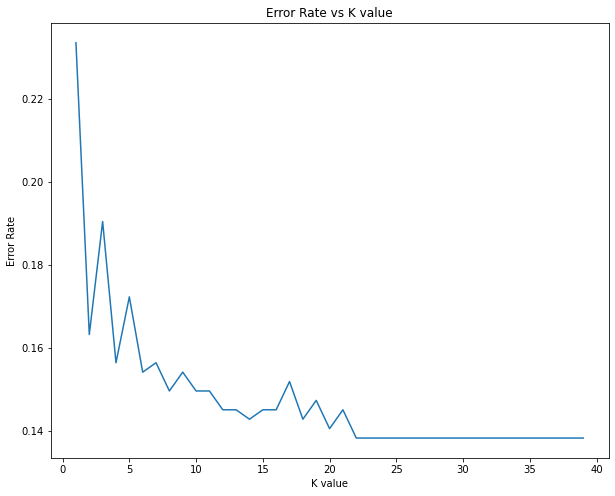

In [32]:
plt.figure(figsize = (10,8))
plt.plot(range(1,40),error_rate)
plt.xlabel('K value')
plt.ylabel('Error Rate')
plt.title('Error Rate vs K value')
plt.show()

In [33]:
models = [LogisticRegression(max_iter=1200000, dual = False), RandomForestClassifier(), SVC(gamma = 'auto'), DecisionTreeClassifier(),GaussianNB(),KNeighborsClassifier(n_neighbors = 22)]
model_names = ['Logistic Regression', 'Random Forest Classifier', 'SVC','Decision Tree Classifier', 'Naive Bayes','KNeigbors Classifier']
f1_score_ = []
roc_auc = []
overall = []
for i,j in zip(model_names,models):
    clf = j
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    f1_score_ =  f1_score(y_test,y_pred) * 100
    roc_auc = roc_auc_score(y_test,y_pred) * 100
    overall.append([i,f1_score_,roc_auc])

In [34]:
metrics = pd.DataFrame(overall, columns = ['Model Name','F1-Score','ROC AUC Score'])
metrics

,Model Name,F1-Score,ROC AUC Score
0,Logistic Regression,48.543689,68.254961
1,Random Forest Classifier,19.444444,55.211389
2,SVC,0.000000,50.000000
3,Decision Tree Classifier,31.428571,60.532787
4,Naive Bayes,40.000000,69.173857
5,KNeigbors Classifier,0.000000,50.000000


Since the dataset is imbalanced we are not using the accuracy score instead F1-Score and ROC AUC Score.

In [35]:
fig = plt.figure(figsize = (10,8))
fig = px.bar(x = metrics['Model Name'], y = metrics['ROC AUC Score'])
fig.show()

<Figure size 720x576 with 0 Axes>

Logistic Regression and Naive Bayes has the highest ROC AUC score so we can go for further analysis.

Fine Tuning for better accuracy of the model :

In [36]:
grid={'C': np.arange(1e-03, 2, 0.01)}
log_GS = GridSearchCV(LogisticRegression(solver='liblinear',
                                         class_weight="balanced", 
                                         random_state=7), param_grid = grid, verbose=True,return_train_score=True,scoring = 'roc_auc', iid = True, cv = 10 )
log_GS.fit(X_train,y_train)
print('Best Estimator : {}'.format(log_GS.best_estimator_))
print('Best Score : {}'.format(log_GS.best_score_))

Fitting 10 folds for each of 200 candidates, totalling 2000 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Best Estimator : LogisticRegression(C=1.9109999999999996, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=7, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)
Best Score : 0.8293406842249635


[Parallel(n_jobs=1)]: Done 2000 out of 2000 | elapsed:  2.5min finished


In [37]:
clf = LogisticRegression(C=1.9109999999999996, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=7, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [38]:
print('F1-Score',round(f1_score(y_test,y_pred)*100))
print('AUC ROC Score',round(roc_auc_score(y_test,y_pred)*100))

F1-Score 40.0
AUC ROC Score 69.0


Since the dataset is imbalanced, I would be using only the AUC ROC Score for comparison with the one without fine tuning.
AUC ROC Score has an increase in it when compared to that.

In [39]:
plt.figure(figsize = (8,5))
fig = ff.create_annotated_heatmap(confusion_matrix(y_test,y_pred))
fig.show()

<Figure size 576x360 with 0 Axes>

329 out of 441 values have been predicted correctly as 0 and 1.

Since, Naive Bayes has no hyper-parameters to fine tune we donot use GridSearch CV for that. 

Overall, after the fine tuning we see that Logistic Regression has the highest ROC AUC score when compared to any other algorithm.

> # Recommendations

* Fields like Human Resources, Technical degree and Marketing has the high attrition percentage of 26%, 24% and 22%.So, the employees has to be introspected carefully to get to know their concerns.


* Employees who have a job satisfaction = 1 has the highest attrition rate of 22.8% which needs to be addressed.


* Research & Development department has the highest attrition percentage of 56.1%.


* Employees who have a work life balance = 1 tend to leave the company very soon when compared to other employees.This should be considered as a benchmark and noted.
